# Khảo sát trực quan đặc tính phân bố biến định lượng liên tục

**BS. Lê Ngọc Khả Nhi**

# Giới thiệu

Trong công đoạn thăm dò dữ liệu, một trong những nội dung quan trọng là khảo sát đặc tính phân bố của các biến định lượng liên tục, bao gồm:

*Phân tích đơn biến:* 

Mục tiêu chính là khảo sát các đặc tính phân phối của biến định lượng, qua việc xác định các yếu tố sau:

- Phát hiện các giá trị bất thường và outliers

- Đặc tính thang đo, giới hạn trên và dưới của thang đo

- Hình dạng tổng quát của phân bố: đối xứng/lệch

- Khuynh hướng trung tâm 

- Độ phân tán: phương sai, độ lệch chuẩn, IQR

- Những mốc quan trọng : tứ phân vị/bách phân vị 2.5, 5, 95, 97.5...

*Phân tích theo điều kiện (so sánh giữa nhiều phân nhóm):*

- Cùng những câu hỏi trên cho mỗi phân nhóm, ngoài ra:

- Tính đồng dạng giữa các phân nhóm,

- Mức độ tương phản giữa các phân nhóm

*Phân tích mô tả có định hướng*

- Không phân tích tổng quát, nhưng tập trung trả lời một câu hỏi thực dụng, thí dụ: Chứng minh tính tương đồng/khác biệt giữa 2 phân nhóm, chứng minh thỏa hoặc vi phạm giả định phân phối chuẩn, chứng minh tính phù hợp của dữ liệu với một họ phân bố xác định.

Ngoài mô tả định lượng bằng trung bình/trung vị, độ phân tán, kiểu hình (Skewness, Kurtosis), khảo sát trực quan là một phương pháp nhanh chóng và tiện lợi cho phép cảm nhận về đặc tính phân bố. Nhiều loại biểu đồ có thể áp dụng như:

- Nhóm biểu đồ mật độ: Biểu đồ tần suất (histogram) và mật độ phân bố 1 & 2 chiều (Kernel density estimation (KDE) plot), Violin plot

- Nhóm biểu đồ tán xạ: scatter plot, Bee-swarm plot

- Nhóm biểu đồ tóm tắt: Box plot, letter-value boxplot (còn gọi là Boxen plot)...

Trong bài thực hành này, Nhi sẽ hướng dẫn các bạn vẽ tất cả những dạng biểu đồ trên bằng thư viện seaborn trong Python

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
ild_df = pd.read_csv('Schleroderma.csv', 
                 sep = ';', 
                 decimal=',', 
                 encoding='latin2')

Về mặt kỹ thuật, ta cần chuẩn bị một số object sau:

+ Danh sách tên các biến cần khảo sát

+ Dictionary phiên dịch tên phân nhóm (biến nhị phân)

+ Dictionary phiên dịch Anh-Việt tên các biến

+ Phổ màu dạng list và hexbin colors (nhị phân).

Mỗi dạng biểu đồ sẽ được áp dụng lần lượt cho 1 biến đơn lẻ, và cho hàng loạt biến bằng 2 hàm riêng.

In [3]:
num_vars = ['Age', 'Height', 'Weight', 'DLNO', 'DLCO', 'KCO', 'VA', 'DmCO', 'Vc']
vn_names = ['Tuổi', 'Chiều cao', 'Cân nặng', 
            'Chỉ số TLNO', 'Chỉ số TLCO', 'DLCO/VA', 
            'Thể tích phế nang', 'Hệ số khuếch tán CO', 'Thể tích mao mạch']

ild_labs = {'Negative': 'Âm tính', 'Positive': 'Dương tính'}
bin_pals = ['#1278e6','#e61244']

trans_dict = {i:j for i,j in zip(num_vars, vn_names)}

trans_dict

{'Age': 'Tuổi',
 'Height': 'Chiều cao',
 'Weight': 'Cân nặng',
 'DLNO': 'Chỉ số TLNO',
 'DLCO': 'Chỉ số TLCO',
 'KCO': 'DLCO/VA',
 'VA': 'Thể tích phế nang',
 'DmCO': 'Hệ số khuếch tán CO',
 'Vc': 'Thể tích mao mạch'}

## Biểu đồ tần suất (Histogram)

Lưu ý: Cho biến liên tục, Nhi sử dụng histogram dạng step thay vì bar. 

Độ phân giải của phép đếm tần suất trong histogram tùy vào tham số bins, có thể cho ra hình ảnh khác biệt. 

In [5]:
def draw_hist(data: pd.DataFrame, 
              x:str, 
              grp: str, 
              bins: int):
    
    df = data.copy()
    df[grp] = df[grp].map(ild_labs)
    
    plt.rcParams["figure.figsize"] = (8,5)
    plt.rcParams.update({'font.size': 12})
    
    sns.histplot(data = df, x = x, hue = grp, element="step", bins = bins, palette=bin_pals)
    plt.xlabel(trans_dict[x])
    plt.ylabel("Tần suất")
    
    plt.show()

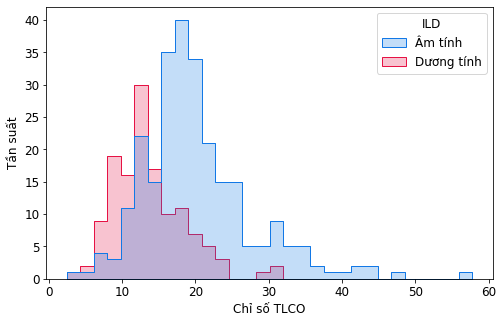

In [6]:
draw_hist(data = ild_df, 
          x = 'DLCO', 
          grp = 'ILD',
          bins = 30)

In [7]:
def multiple_hist(data: pd.DataFrame,
                 feats: list,
                 grp: str,
                 n_bins = 30):
    
    plt.rcParams["figure.figsize"] = (10,7)
    plt.rcParams.update({'font.size': 10})
    
    fig, axes = plt.subplots(nrows=3, ncols=3)
    fig.subplots_adjust(hspace=0.5)
    
    fig.suptitle(f'Đặc tính phân bố của {len(feats)} biến')
    
    for ax,feature in zip(axes.flatten(), feats):
        
        lim = data[feature].min(), data[feature].max()
        
        for k,c in zip(data[grp].unique(),bin_pals):
            df = data[data[grp] == k][[feature]]
            
            sns.histplot(data = df, 
                     x = feature, 
                     element="step", 
                     color = c, 
                     alpha = 0.3,
                     ax = ax,
                     bins = n_bins,
                     label = ild_labs[k])
            
        ax.set_xlabel(trans_dict[feature])
        
    axes.flatten()[1].legend(loc='center', bbox_to_anchor=(0.5,1.25), ncol=2)
    
    plt.tight_layout()
    plt.show()

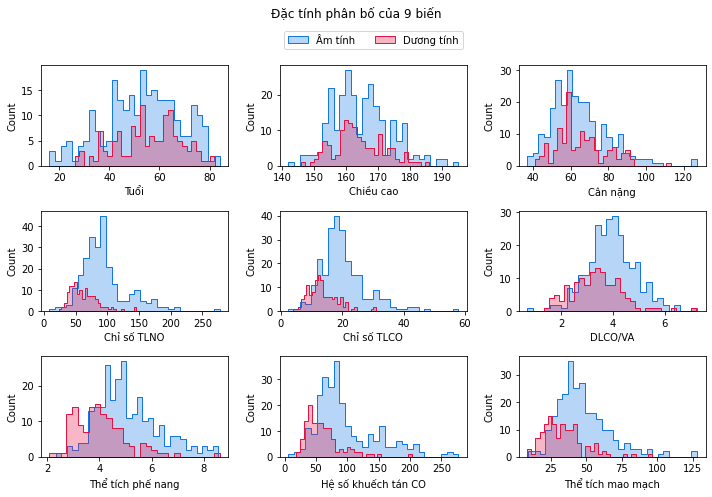

In [8]:
multiple_hist(data = ild_df,
             feats = num_vars,
             grp = 'ILD')

## Biểu đồ mật độ phân bố (1D KDE plot)

Lưu ý: Để thể hiện trung thực thang đo của dữ liệu, cần áp dụng clip = (min, max) với min, max là 2 giá trị cực tiểu và cực đại của biến.

Có thể kết hợp với rugplot là 1 dạng biểu đồ chỉ dùng yếu tố hình họa duy nhất là thang đo, để mô tả chi tiết hơn về vị trí và độ phân tán các giá trị trên thang đo.

Trong hầu hết trường hợp, KDE plot là dạng biểu đồ hữu dụng nhất, nó cho phép cảm nhận nhanh chóng và chính xác đặc tính phân bố của dữ liệu, cũng như so sánh giữa các phân nhóm.

In [9]:
def draw_kde(data: pd.DataFrame, 
             x:str, 
             grp: str):
    
    plt.rcParams["figure.figsize"] = (8,5)
    plt.rcParams.update({'font.size': 12})
    
    lim = data[x].min(), data[x].max()
    
    for k,c in zip(data[grp].unique(),bin_pals):
        df = data[data[grp] == k][[x]]
        
        sns.kdeplot(data = df[x],
                    shade = True,
                    color = c,
                    clip = lim,
                    alpha = 0.3,
                    label = ild_labs[k])
        
        sns.rugplot(data = df[x],
                    color = c, 
                    alpha = 0.4)
        
    plt.xlabel(trans_dict[x])
    plt.ylabel("Tần suất")
    plt.legend()
    
    plt.show()

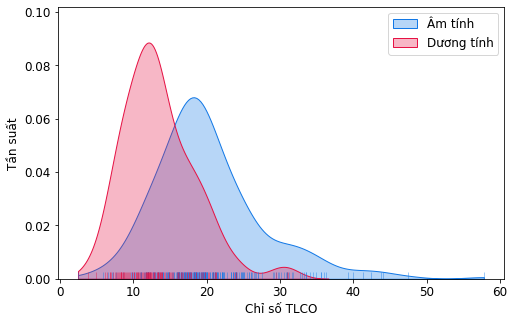

In [10]:
draw_kde(data = ild_df, 
          x = 'DLCO', 
          grp = 'ILD',)

In [11]:
def multiple_kde(data: pd.DataFrame,
                 feats: list,
                 grp: str):
    
    plt.rcParams["figure.figsize"] = (10,7)
    plt.rcParams.update({'font.size': 10})
    
    fig, axes = plt.subplots(nrows=3, ncols=3)
    fig.subplots_adjust(hspace=0.5)
    
    fig.suptitle(f'Đặc tính phân bố của {len(feats)} biến')
    
    for ax,feature in zip(axes.flatten(), feats):
        
        lim = data[feature].min(), data[feature].max()
        
        for k,c in zip(data[grp].unique(),bin_pals):
            df = data[data[grp] == k][[feature]]
            
            sns.kdeplot(data = df[feature],
                    shade = True,
                    color = c,
                    clip = lim,
                    alpha = 0.3,
                    label = ild_labs[k],
                    ax = ax)
        
            sns.rugplot(data = df[feature],
                        color = c, 
                        alpha = 0.4,
                        ax = ax)
            
        ax.set_xlabel(trans_dict[feature])
        
    axes.flatten()[1].legend(loc='center', bbox_to_anchor=(0.5,1.25), ncol=2)
    
    plt.tight_layout()
    plt.show()

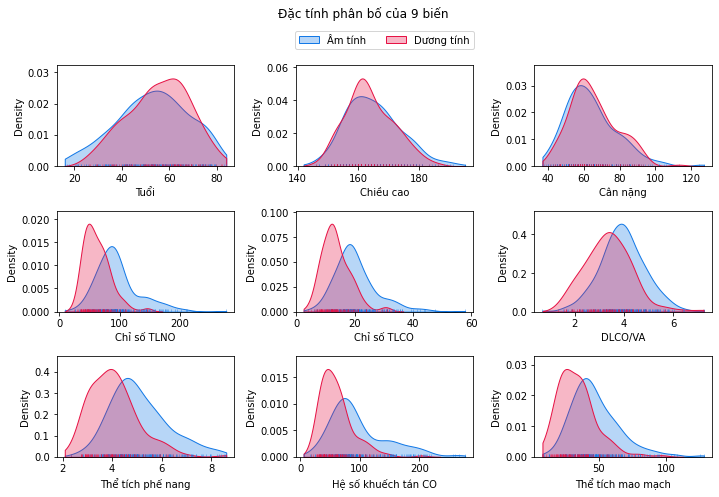

In [12]:
multiple_kde(data = ild_df,
             feats = num_vars,
             grp = 'ILD')

## Letter value boxplot 

Còn gọi là Boxen plot, đây là một dạng biểu đồ có mật độ thông tin cao hơn so với boxplot nhưng đơn giản hơn so với violin plot và KDE plot. Nó thích hợp cho mục tiêu so sánh.

Biểu đồ letter value box sử dụng các hình hộp để trình bày các phân vị dữ liệu được chia nhỏ một cách đệ quy, từ trung vị, đến tứ phân vị, sau đó chia nhỏ dần về 2 đuôi của phân bố cho đến khi không thể chia nhỏ hơn được nữa (outliers).

In [13]:
def draw_boxen(data: pd.DataFrame, 
             x:str, 
             grp: str):
    
    df = data.copy()
    df[grp] = df[grp].map(ild_labs)
    
    plt.rcParams["figure.figsize"] = (8,4)
    plt.rcParams.update({'font.size': 12})
    
    sns.boxenplot(data = df, 
                  x = x,
                  y = grp,
                  hue = grp,
                  showfliers = False,
                  palette = bin_pals)
    
    plt.xlabel(trans_dict[x])
    plt.ylabel("Phân nhóm")
    plt.legend(loc = 'lower right')
    
    plt.show()

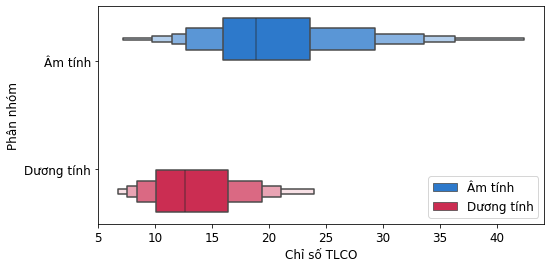

In [14]:
draw_boxen(data = ild_df, x = 'DLCO', grp = 'ILD')

In [15]:
def multiple_boxen(data: pd.DataFrame,
                   feats: list,
                   grp: str):
    
    df = data.copy()
    df[grp] = df[grp].map(ild_labs)
    
    plt.rcParams["figure.figsize"] = (10,7)
    plt.rcParams.update({'font.size': 10})
    
    fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True)
    fig.subplots_adjust(hspace=0.5)
    
    fig.suptitle(f'Letter value boxplot của {len(feats)} biến')
    
    for feature,ax, in zip(feats, axes.flatten()):
        
        sns.boxenplot(data = df, 
                      x = feature,
                      y = grp,
                      hue = grp,
                      showfliers = False,
                      ax = ax,
                      palette = bin_pals)
            
        ax.set_xlabel(trans_dict[feature])
        if ax == axes.flatten()[1]:
            axes.flatten()[1].legend(loc='center', bbox_to_anchor=(0.5,1.25), ncol=2)
        else:
            ax.get_legend().remove()
        
    plt.tight_layout()
    plt.show()

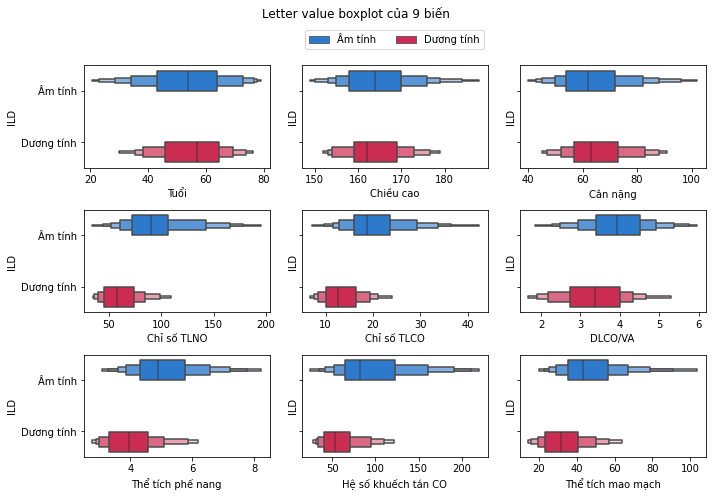

In [16]:
multiple_boxen(data = ild_df,
             feats = num_vars,
             grp = 'ILD')

## Biểu đồ hộp (Boxplot)

Boxplot là dạng biểu đồ hữu dụng cho cho mục tiêu so sánh giữa các phân nhóm, nó chỉ trình bày tóm tắt vài trị số thống kê quan trọng, bao gồm Trung vị, 2 tứ phân vị Q1, Q3 và 2 vị trí cực điểm (min, max hoặc Q1- k * IQR, Q3 + k * IQR với giá trị k tùy chọn từ 1 đến 1.5)

In [17]:
def draw_box(data: pd.DataFrame, 
             x:str, 
             grp: str):
    
    df = data.copy()
    df[grp] = df[grp].map(ild_labs)
    
    plt.rcParams["figure.figsize"] = (8,4)
    plt.rcParams.update({'font.size': 12})
    
    sns.boxplot(data = df, 
                x = x,
                y = grp,
                hue = grp,
                showfliers = False,
                palette = bin_pals)
    
    plt.xlabel(trans_dict[x])
    plt.ylabel("Phân nhóm")
    plt.legend(loc = 'lower right')
    
    plt.show()

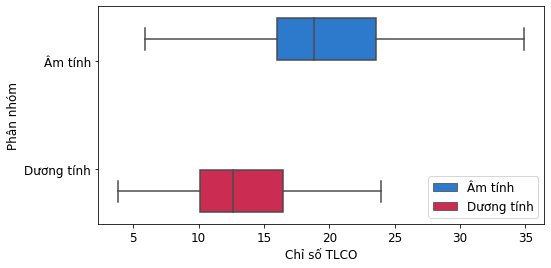

In [18]:
draw_box(data = ild_df, x = 'DLCO', grp = 'ILD')

In [19]:
def multiple_box(data: pd.DataFrame,
                feats: list,
                grp: str):
    
    df = data.copy()
    df[grp] = df[grp].map(ild_labs)
    
    plt.rcParams["figure.figsize"] = (10,7)
    plt.rcParams.update({'font.size': 10})
    
    fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True)
    fig.subplots_adjust(hspace=0.5)
    
    fig.suptitle(f'Tukey boxplot của {len(feats)} biến')
    
    for feature,ax, in zip(feats, axes.flatten()):
        
        sns.boxplot(data = df, 
                      x = feature,
                      y = grp,
                      hue = grp,
                      showfliers = False,
                      ax = ax,
                      palette = bin_pals)
            
        ax.set_xlabel(trans_dict[feature])
        if ax == axes.flatten()[1]:
            axes.flatten()[1].legend(loc='center', bbox_to_anchor=(0.5,1.25), ncol=2)
        else:
            ax.get_legend().remove()
        
    plt.tight_layout()
    plt.show()

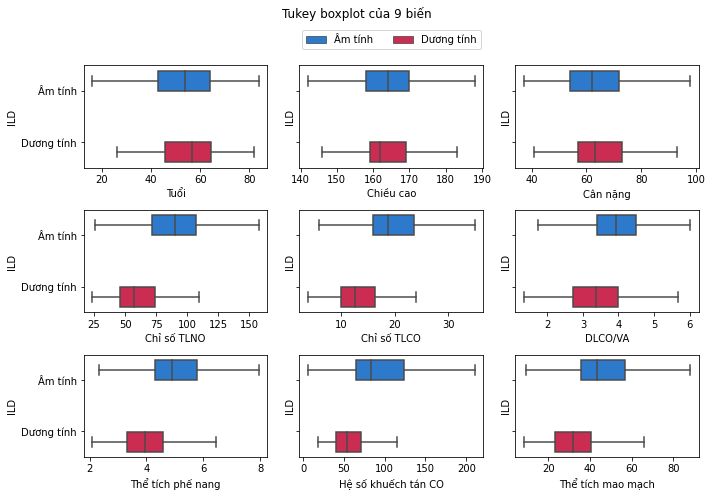

In [20]:
multiple_box(data = ild_df,
             feats = num_vars,
             grp = 'ILD')

## Violin plot

Violin plot kết hợp ưu điểm của hiệu ứng so sánh khoảng cách (boxplot) và so sánh diện tích (hình ảnh đối xứng gương của KDE plot), nó vừa tóm tắt được các thông tin quan trọng như boxplot, vừa đầy đủ chi tiết như KDE plot. 

In [21]:
def draw_violin(data: pd.DataFrame, 
                x:str, 
                grp: str):
    
    df = data.copy()
    df[grp] = df[grp].map(ild_labs)
    
    plt.rcParams["figure.figsize"] = (8,4)
    plt.rcParams.update({'font.size': 12})
    
    sns.violinplot(data = df, 
                x = x,
                y = grp,
                hue = grp,
                showfliers = False,
                palette = bin_pals)
    
    plt.xlabel(trans_dict[x])
    plt.ylabel("Phân nhóm")
    plt.legend(loc = 'lower right')
    
    plt.show()

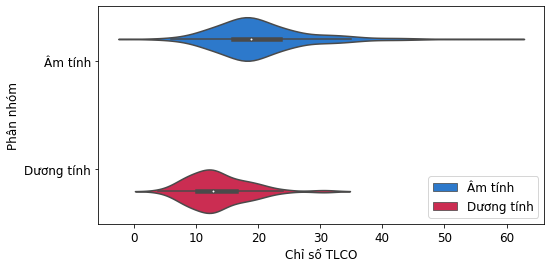

In [22]:
draw_violin(data = ild_df, x = 'DLCO', grp = 'ILD')

In [23]:
def multiple_violin(data: pd.DataFrame,
                   feats: list,
                   grp: str):
    
    df = data.copy()
    df[grp] = df[grp].map(ild_labs)
    
    plt.rcParams["figure.figsize"] = (10,7)
    plt.rcParams.update({'font.size': 10})
    
    fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True)
    fig.subplots_adjust(hspace=0.5)
    
    fig.suptitle(f'Violin plot của {len(feats)} biến')
    
    for feature,ax, in zip(feats, axes.flatten()):
        
        sns.violinplot(data = df, 
                      x = feature,
                      y = grp,
                      hue = grp,
                      showfliers = False,
                      ax = ax,
                      palette = bin_pals)
            
        ax.set_xlabel(trans_dict[feature])
        if ax == axes.flatten()[1]:
            axes.flatten()[1].legend(loc='center', bbox_to_anchor=(0.5,1.25), ncol=2)
        else:
            ax.get_legend().remove()
        
    plt.tight_layout()
    plt.show()

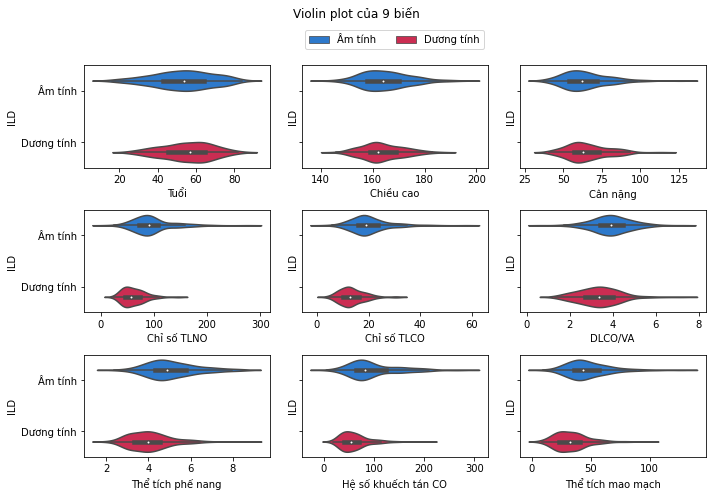

In [24]:
multiple_violin(data = ild_df,
             feats = num_vars,
             grp = 'ILD')

## Biểu đồ tán xạ (jitter plot hay strip plot)

Đây là một biến thể của biểu đồ tán xạ áp dụng cho 1 biến định lượng và 1 biến định tính thay vì 2 biến định lượng. Ưu điểm duy nhất của nó là thông tin chi tiết đến từng cá thể, nhưng hình ảnh này lại không mấy hiệu quả cho mục tiêu khảo sát phân bố nên ít thông dụng.

In [25]:
def draw_jitter(data: pd.DataFrame, 
                x:str, 
                grp: str):
    
    df = data.copy()
    df[grp] = df[grp].map(ild_labs)
    
    plt.rcParams["figure.figsize"] = (8,4)
    plt.rcParams.update({'font.size': 12})
    
    sns.stripplot(data = df, 
                x = x,
                y = grp,
                hue = grp,
                alpha = 0.8,
                palette = bin_pals)
    
    plt.xlabel(trans_dict[x])
    plt.ylabel("Phân nhóm")
    plt.legend(loc = 'lower right')
    
    plt.show()

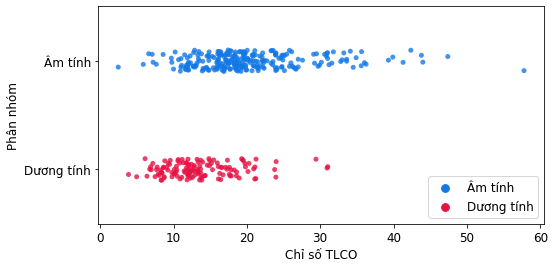

In [26]:
draw_jitter(data = ild_df, x = 'DLCO', grp = 'ILD')

In [27]:
def multiple_jitter(data: pd.DataFrame,
                      feats: list,
                      grp: str):
    
    df = data.copy()
    df[grp] = df[grp].map(ild_labs)
    
    plt.rcParams["figure.figsize"] = (10,7)
    plt.rcParams.update({'font.size': 10})
    
    fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True)
    fig.subplots_adjust(hspace=0.5)
    
    fig.suptitle(f'Jitter plot của {len(feats)} biến')
    
    for feature,ax, in zip(feats, axes.flatten()):
        
        sns.stripplot(data = df, 
                      x = feature,
                      y = grp,
                      hue = grp,
                      ax = ax,
                      alpha = 0.5,
                      palette = bin_pals)
            
        ax.set_xlabel(trans_dict[feature])
        if ax == axes.flatten()[1]:
            axes.flatten()[1].legend(loc='center', bbox_to_anchor=(0.5,1.25), ncol=2)
        else:
            ax.get_legend().remove()
        
    plt.tight_layout()
    plt.show()

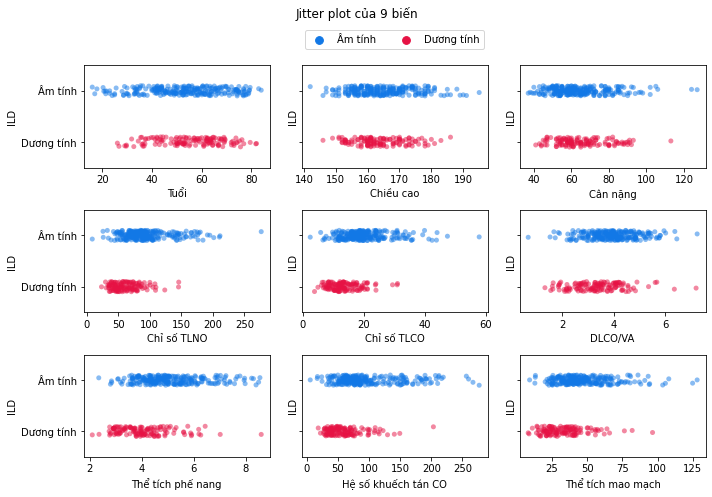

In [28]:
multiple_jitter(data = ild_df,
                  feats = num_vars,
                  grp = 'ILD')

## Beeswarm plot

Biểu đồ Beeswarm plot kết hợp ưu thế của biểu đồ tán xạ (hình họa điểm, so sánh tọa độ) và biểu đồ violin plot (hình họa diện tích). Đây chỉ là biến thể có ý nghĩa nhất định về phong cách mỹ thuật, nhưng không có sự vượt trội nào hơn so với violin plot  hoặc KDE plot.

In [29]:
def draw_beeswarm(data: pd.DataFrame, 
             x:str, 
             grp: str):
    
    df = data.copy()
    df[grp] = df[grp].map(ild_labs)
    
    plt.rcParams["figure.figsize"] = (8,4)
    plt.rcParams.update({'font.size': 12})
    
    sns.swarmplot(data = df, 
                x = x,
                y = grp,
                hue = grp,
                alpha = 0.8,
                palette = bin_pals)
    
    plt.xlabel(trans_dict[x])
    plt.ylabel("Phân nhóm")
    plt.legend(loc = 'lower right')
    
    plt.show()

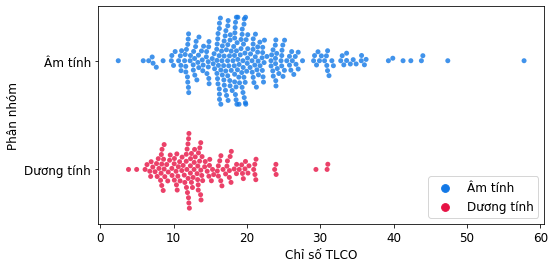

In [30]:
draw_beeswarm(data = ild_df, x = 'DLCO', grp = 'ILD')

In [31]:
def multiple_beeswarm(data: pd.DataFrame,
                      feats: list,
                      grp: str):
    
    df = data.copy()
    df[grp] = df[grp].map(ild_labs)
    
    plt.rcParams["figure.figsize"] = (10,7)
    plt.rcParams.update({'font.size': 10})
    
    fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True)
    fig.subplots_adjust(hspace=0.5)
    
    fig.suptitle(f'Beeswarm plot của {len(feats)} biến')
    
    for feature,ax, in zip(feats, axes.flatten()):
        
        sns.swarmplot(data = df, 
                      x = feature,
                      y = grp,
                      hue = grp,
                      ax = ax,
                      alpha = 0.8,
                      s = 2,
                      palette = bin_pals)
            
        ax.set_xlabel(trans_dict[feature])
        if ax == axes.flatten()[1]:
            axes.flatten()[1].legend(loc='center', bbox_to_anchor=(0.5,1.25), ncol=2)
        else:
            ax.get_legend().remove()
        
    plt.tight_layout()
    plt.show()

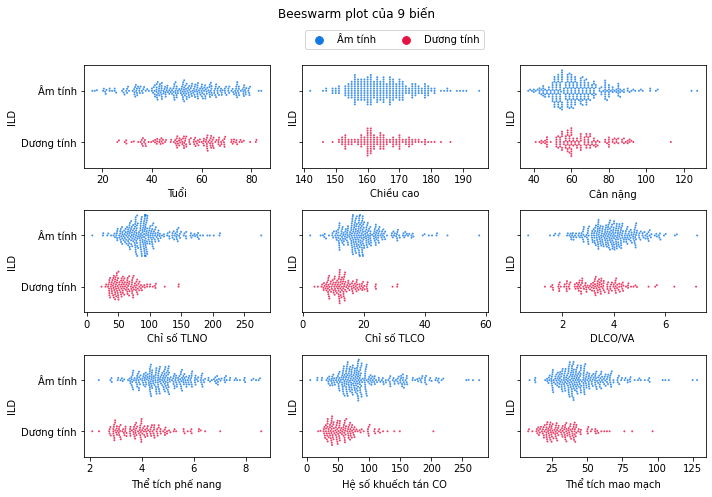

In [32]:
multiple_beeswarm(data = ild_df,
                  feats = num_vars,
                  grp = 'ILD')

## Faceted KDE plot

Trường hợp đặc biệt khi ta khảo sát tập hợp nhiều biến có cùng thang đo và đơn vị đo, có thể chồng nhiều KDE plot chung một thang đo.

Thí dụ 8 thông số chức năng hô hấp đã được chuẩn hóa (z-scores)

Dạng biểu đồ này có hiệu quả rất cao cho mục tiêu so sánh đặc tính phân bố giữa các biến, nó được ứng dụng nhiều trong thống kê Bayes để biểu diễn các phân phối hậu nghiệm của tham số trong mô hình.

In [42]:
def facetted_kde(data: pd.DataFrame, feats: list, grp: str):
    
    df = data[feats + [grp]].melt(id_vars= grp)
    
    g = sns.FacetGrid(df, 
                      row="variable", 
                      hue=grp, 
                      aspect=4, 
                      height=1.2, 
                      palette=bin_pals)
    
    g.map(sns.kdeplot,'value',
          clip_on=False,
          shade=True,
          alpha=0.3, 
          linewidth=1)
    
    g.map(plt.axhline, 
          y=0, 
          lw=1,
          color = 'k',
          clip_on=False)
    
    g.map(plt.axvline, 
          x=0, 
          lw=1,
          color = 'k',
          clip_on=False)
    
    for ax in g.axes:
        var_name = ax[0].get_title().split(' = ')[1]
        ax[0].set_title('')
        ax[0].set_ylabel(var_name)
    
    g.add_legend(markerscale=2)
    g.despine(bottom=True, left=True)
    g.set(yticks=[])
    
    plt.show()

In [35]:
ild_df.columns

Index(['Id', 'Sex', 'Age', 'Height', 'Weight', 'DLNO', 'DLCO', 'KCO', 'VA',
       'DmCO', 'Vc', 'DLNO_pred', 'DLNO_Z', 'DLNO_%pred', 'DLCO_Z',
       'DLCO_%pred', 'VA_Z', 'VA_%pred', 'DmCO_Z', 'DmCO_%pred', 'Vc_Z',
       'Vc_%pred', 'KCO_Z', 'KCO_%pred', 'TLC', 'TLC_Z', 'TLC_%pred', 'FEV1',
       'FEV1_Z', 'FEV1_%pred', 'FVC', 'FVC_Z', 'FVC_%pred', 'Tiffneau',
       'Tiffneau_%pred', 'Tiffneau_Z', 'NYHA', 'Smoking', 'Type', 'PAH',
       'ILD'],
      dtype='object')

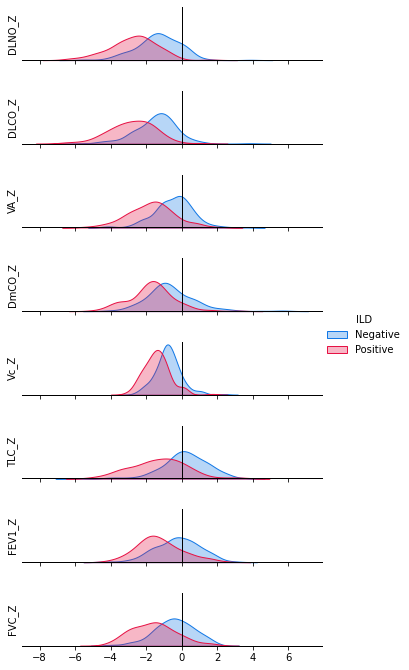

In [44]:
z_feats = ['DLNO_Z','DLCO_Z','VA_Z', 'DmCO_Z','Vc_Z','TLC_Z','FEV1_Z','FVC_Z',]

facetted_kde(data = ild_df, feats = z_feats, grp = 'ILD')

# Tổng kết

So với mô tả định lượng và các kiểm định Normality check, phương pháp mô tả trực quan có nhiều lợi thế hơn như: cung cấp hình ảnh rõ ràng và chi tiết về đặc tính phân bố chứ không trừu tượng như các số đo Skewness, Kurtosis, cho phép hình dung chính xác về hình dạng, khuynh hương trung tâm, độ phân tán, tính đồng dạng và tương phản về phân bố dữ liệu giữa các phân nhóm.

Có sự liên hệ mang tính kế thừa và tương hợp giữa đặc tính phân bố của dữ liệu và phương pháp thống kê được sử dụng trong kế hoạch phân tích. Một số kiểm định thống kê đặt ra yêu cầu giả định về phân phối chuẩn, phương sai đồng nhất... nên không sử dụng được khi dữ liệu vi phạm các giả định này. Xác định phân phối đúng còn đảm bảo tính chính xác của suy diễn thống kê. 

Thông tin rút ra từ kết quả phân tích mô tả trực quan cho phép:

- Phát hiện kịp thời những bất thường trong dữ liệu như hoảng trống trên thang đo, outliers

- Chọn lựa loại kiểm định và loại mô hình phù hợp cho bài toán.

- Chọn lựa đúng họ phân phối cho biến kết quả trong mô hình hồi quy.

- Dự đoán được khuynh hướng liên hệ tương quan giữa biến định lượng và định tính, tương phản/khác biệt giữa phân nhóm, nhận diện hiệp biến, tập hợp biến hữu dụng cho mô hình

- Xác định phạm vi áp dụng của mô hình

- Áp dụng kỹ thuật hoán chuyển dữ liệu phù hợp để giải quyết vấn đề kỹ thuật, tối ưu hóa kết quả

Mỗi loại biểu đồ được trình bày ở trên có ưu thế và giới hạn khác nhau. Tùy theo hoàn cảnh, mục tiêu của phân tích cũng như tiêu chí mỹ thuật mà ta chọn loại biểu đồ phù hợp.